width=600, height=322, depth=3


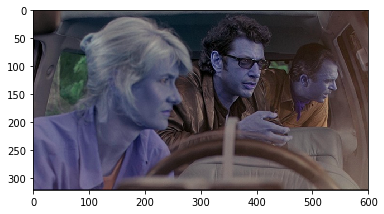

In [9]:
#references https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/
# import the necessary packages
import imutils
import cv2
from matplotlib import pyplot as plt
 
# load the input image and show its dimensions, keeping in mind that
# images are represented as a multi-dimensional NumPy array with
# shape no. rows (height) x no. columns (width) x no. channels (depth)
image = cv2.imread("jp.png")
#the variable image  is actually just a NumPy array.

#extract the height, width, and depth
(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d))
 
# display the image to our screen -- we will need to click the window
# open by OpenCV and press a key on our keyboard to continue execution
#!!imshow is not rendering in colab or Jupiter Notebooks
# cv2.imshow("Image", image)
# cv2.waitKey(0)
#Show the image with matplotlib
plt.imshow(image)
plt.show()


In OpenCV color images in the RGB (Red, Green, Blue) color space have a 3-tuple associated with each pixel: (B, G, R) .

Notice the ordering is BGR rather than RGB. This is because when OpenCV was first being developed many years ago the standard was BGR ordering. Over the years, the standard has now become RGB but OpenCV still maintains this “legacy” BGR ordering to ensure no existing code breaks.

In [12]:
# access the RGB pixel located at x=50, y=100, keepind in mind that
# OpenCV stores images in BGR order rather than RGB
(B, G, R) = image[100, 50]
print("R={}, G={}, B={}".format(R, G, B))

R=41, G=49, B=37


# Array slicing and cropping
Extracting “regions of interest” (ROIs), let us manually extract an ROI. This can be accomplished with array slicing


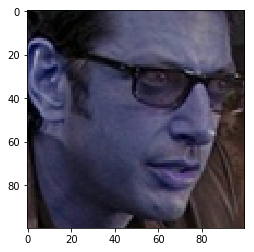

In [14]:
# extract a 100x100 pixel square ROI (Region of Interest) from the
# input image starting at x=320,y=60 at ending at x=420,y=160
roi = image[60:160, 320:420]
#Array slicing as shown above with formate of image[startY:endY, startX:endX]

plt.imshow(roi)
plt.show()

# Resizing images
Resizing images is important for a number of reasons. First, you might want to resize a large image to fit on your screen. Image processing is also **faster on smaller images** because there are **fewer pixels to process**. In the case of **deep learning**, we often **resize images**, ignoring aspect ratio, so that the **volume fits into a network** which requires that an image be square and of a certain dimension.

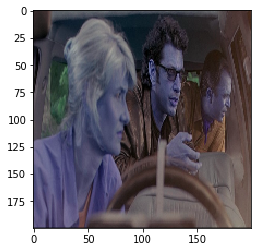

In [15]:
# resize the image to 200x200px, ignoring aspect ratio
resized = cv2.resize(image, (200, 200))
plt.imshow(resized)
plt.show()

Image is resized but is now distorted because we didn’t take into account the aspect ratio. Let’s calculate the aspect ratio of the original image and use it to resize an image so that it doesn’t appear squished and distorted:

Let’s say that we want to take our **600-pixel** wide image and resize it to **300 pixels wide** while *maintaining aspect ratio*.

we **calculate** the **ratio** of the new width to the old width (which happens to be **0.5**).

From there, we specify our dimensions of the new image, dim . We know that we want a 300-pixel wide image, but we must calculate the height using the ratio by multiplying h  by r  (the original height and our ratio respectively).

Feeding **dim  (our dimensions) into the cv2.resize**  function, we’ve now obtained a new image named resized  which is not distorted


width=300, height=161, depth=3


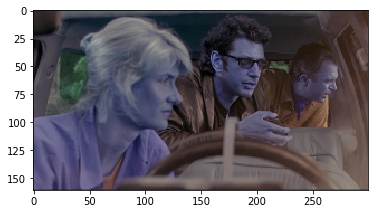

In [19]:
# fixed resizing and distort aspect ratio so let's resize the width
# to be 300px but compute the new height based on the aspect ratio
r = 300.0 / w
dim = (300, int(h * r))
resized = cv2.resize(image, dim)
(hr, wr, dr) = resized.shape
print("width={}, height={}, depth={}".format(wr, hr, dr))
plt.imshow(resized)
plt.show()


Calculating Aspect ration automatically with imutils

width=400, height=214, depth=3


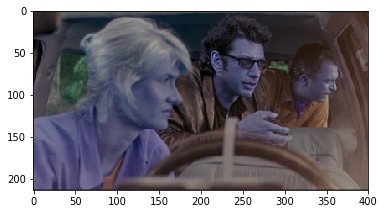

In [20]:
# manually computing the aspect ratio can be a pain so let's use the
# imutils library instead
resized = imutils.resize(image, width=400)
(hr, wr, dr) = resized.shape
print("width={}, height={}, depth={}".format(wr, hr, dr))
plt.imshow(resized)
plt.show()

# Rotating an image
We use //  to perform integer math (i.e., no floating point values).
From there we calculate a rotation matrix, M . The -45  means that we’ll rotate the image 45 degrees clockwise. Positive angles are counterclockwise and negative angles are clockwise.

From there we warp the image using the matrix (effectively rotating it)

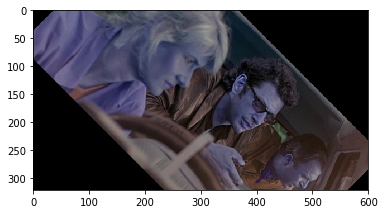

In [21]:
# let's rotate an image -45 degrees clockwise using OpenCV by first
# computing the image center, then constructing the rotation matrix,
# and then finally applying the affine warp
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, -45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt.imshow(rotated)
plt.show()

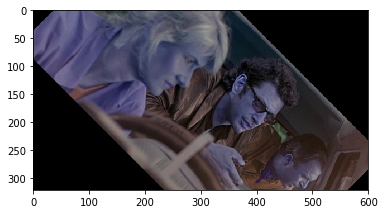

In [22]:
# rotation can also be easily accomplished via imutils with less code
rotated = imutils.rotate(image, -45)
plt.imshow(rotated)
plt.show()

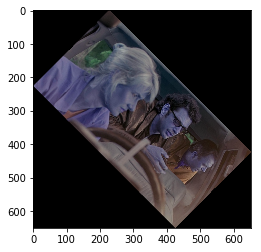

In [24]:
# OpenCV doesn't "care" if our rotated image is clipped after rotation
# so we can instead use another imutils convenience function to help
# us out so that we wont clip away the image which happens with normal OpenCV operations
rotated = imutils.rotate_bound(image, 45)
plt.imshow(rotated)
plt.show()

# Smoothing an image
In many image processing pipelines, we must **blur an image** to **reduce high-frequency noise**, making it **easier** for our algorithms to **detect and understand the actual contents** of the image **rather than** just **noise** that will “**confuse**” our algorithms. Blurring an image is very easy in OpenCV and there are a number of ways to accomplish it.

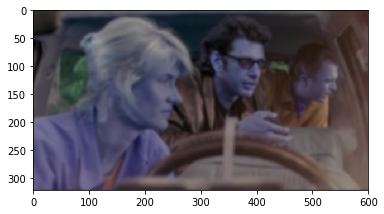

In [26]:
# apply a Gaussian blur with a 11x11 kernel to the image to smooth it,
# useful when reducing high frequency noise
blurred = cv2.GaussianBlur(image, (11, 11), 0)
plt.imshow(blurred)
plt.show()


#Larger kernels would yield a more blurry image. Smaller kernels will create less blurry images.

# Drawing on an image
In this section, we’re going to draw a rectangle, circle, and line on an input image. We’ll also overlay text on an image as well.

Before we move on with drawing on an image with OpenCV, take note that drawing operations on images are performed in-place. Therefore at the beginning of each code block, we make a copy of the original image storing the copy as output . We then proceed to draw on the image called output in-place so we do not destroy our original image.

Let’s draw a rectangle around Ian Malcolm’s face:

* img : The destination image to draw upon. We’re drawing on output .


* pt1 : Our starting pixel coordinate which is the top-left. In our case, the top-left is (320, 60) .
* pt2 : The ending pixel — bottom-right. The bottom-right pixel is located at  (420, 160) .
* Color : BGR tuple. To represent red, I’ve supplied (0 , 0, 255) .
* Thickness : Line thickness (a negative value will make a solid rectangle). I’ve supplied a thickness of 2 .

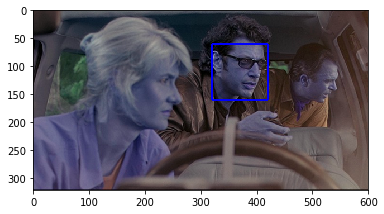

In [27]:
# draw a 2px thick red rectangle surrounding the face
output = image.copy()
cv2.rectangle(output, (320, 60), (420, 160), (0, 0, 255), 2)
plt.imshow(output)
plt.show()

And now let’s place a solid blue **circle** in front of Dr. Ellie Sattler’s face:
* img : The output image.
* Center : Our circle’s center coordinate. I supplied (300, 150)  which is right in front of Ellie’s eyes.
* Radius : The circle radius in pixels. I provided a value of 20  pixels.
* Color : Circle color. This time I went with blue as is denoted by 255 in the B and 0s in the G + R components of the BGR tuple, (255, 0, 0) .
* Thickness : The line thickness. Since I supplied a negative value ( -1 ), the circle is solid/filled in.

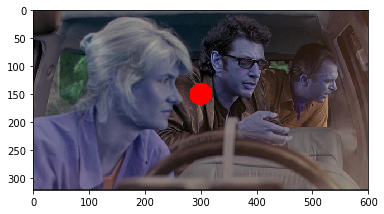

In [30]:
# draw a blue 20px (filled in) circle on the image centered at
# x=300,y=150
output = image.copy()
cv2.circle(output, (300, 150), 20, (255, 0, 0), -1)
plt.imshow(output)
plt.show()

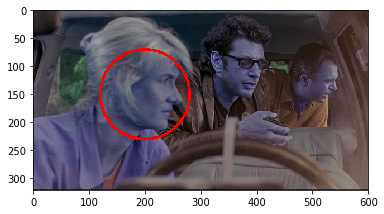

In [35]:
#Circle around the Dr. Ellie Sattler’s face
# draw a blue 20px (filled in) circle on the image centered at
# x=300,y=150
output = image.copy()
cv2.circle(output, (200, 150), 80, (255, 0, 0), 4)
plt.imshow(output)
plt.show()

Next, we’ll draw a line. This line goes through Ellie’s head, past her eye, and to Ian’s hand.

If you look carefully at the method parameters and compare them to that of the rectangle, you’ll notice that they are identical:

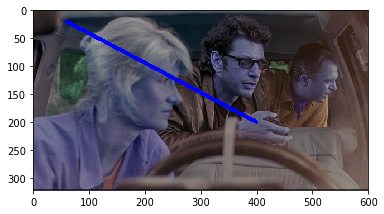

In [36]:
# draw a 5px thick red line from x=60,y=20 to x=400,y=200
output = image.copy()
cv2.line(output, (60, 20), (400, 200), (0, 0, 255), 5)
plt.imshow(output)
plt.show()

Oftentimes you’ll find that you want to overlay text on an image for display purposes. If you’re working on face recognition you’ll likely want to draw the person’s name above their face. Or if you advance in your computer vision career you may build an image classifier or object detector. In these cases, you’ll find that you want to draw text containing the class name and probability.

The putText  function of OpenCV is responsible for drawing text on an image. Let’s take a look at the required parameters:

* img : The output image.
* text : The string of text we’d like to write/draw on the image.
* pt : The starting point for the text.
* font : I often use the cv2.FONT_HERSHEY_SIMPLEX . The available fonts are listed here.
* scale : Font size multiplier.
* color : Text color.
* thickness : The thickness of the stroke in pixels.

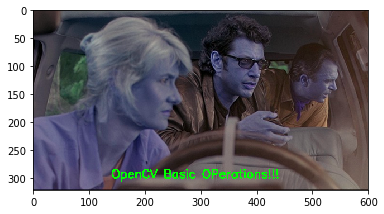

In [46]:
# draw green text on the image
output = image.copy()
cv2.putText(output, "OpenCV Basic OPerations!!!", (140, 300), 
	cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
plt.imshow(output)
plt.show()